In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 



import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'/content/50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
print('Number of Row{}columns'.format(data.shape))


Number of Row(50, 5)columns


##Descriptive Analysis

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Observation: There are no Null Values in the Data set by reading Counts from Above

In [ ]:
Checking for Data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Renaming the Columns Name

df = data.copy()
df = data.rename({"R&D Spend":'RDS',"Administration":'ADMS',"Marketing Spend":'MKTS',"State":'State',"Profit":'Profit'},axis=1)
df.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
##Checking for missing values

In [9]:
df.isnull().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [10]:
df[df.values==0.0]

,RDS,ADMS,MKTS,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


^Observation: Notice there are some '0' values in the data in some features,

#Visualizing Missing Values

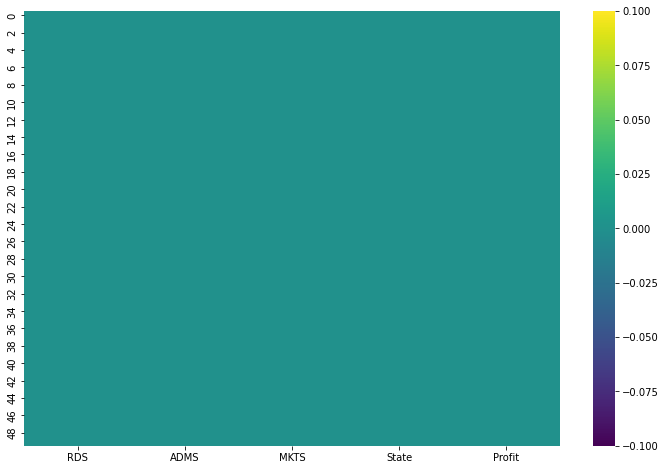

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [ ]:
#^Observation: No missing Values are present in the data set

In [ ]:
#Checking for Duplicated Values

In [12]:
df[df.duplicated()].shape

(0, 5)

In [13]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [14]:
df[df.duplicated()]

,RDS,ADMS,MKTS,State,Profit


^Observation: There are no duplicated values in the dataset

#Visualizing Continuous Datatype for Outlier Detection

In [15]:
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


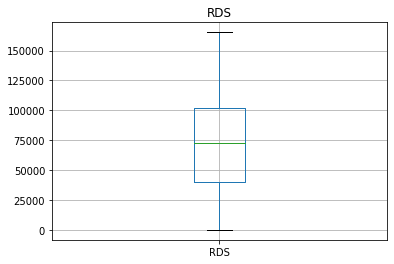

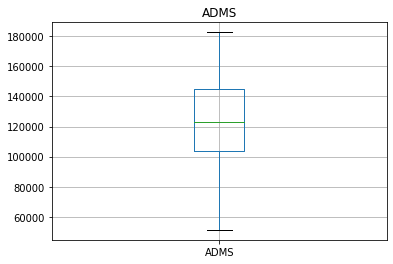

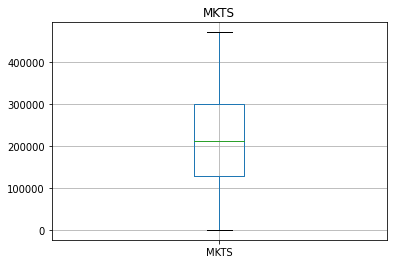

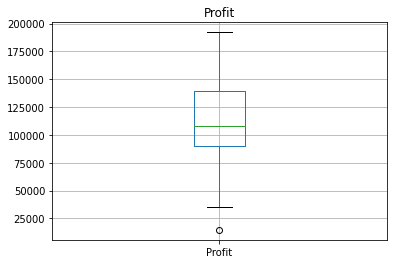

In [16]:
for feature in continuous_feature:
    data=df.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

#Let's try to find the Outliers in the Profit Dependent Variable

In [17]:
Q1 = np.quantile(df.Profit,0.25)
Q3 = np.quantile(df.Profit,0.75)
med = np.median(df.Profit)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)

print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [18]:
Outliers = df.Profit[(df.Profit <= lower_bound) | (df.Profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: Profit, dtype: float64


In [19]:
display(df[df.index.isin([49])],df.head())

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e58345ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e582eded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e582e6e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e584b3690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e58459b90>],
 'means': []}

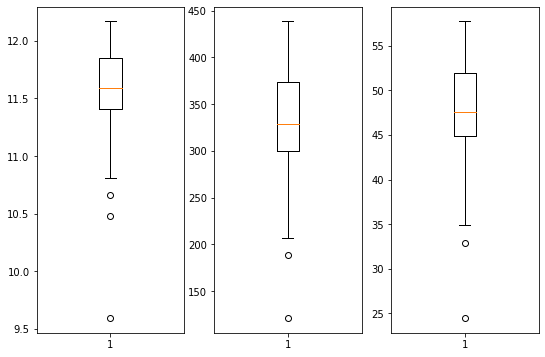

In [20]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['Profit']))

^Observation: Even After Transformation we cannot get rid of the outlier

#Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

#R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

In [21]:
# Measure goodness-of-fit by finding rsquared values (percentage of variance)

raw_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df).fit()

In [22]:
# Finding rsquared values

raw_model.rsquared , raw_model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

Let's try Median Imputation to handle Outlier in Profit

In [24]:
df.Profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

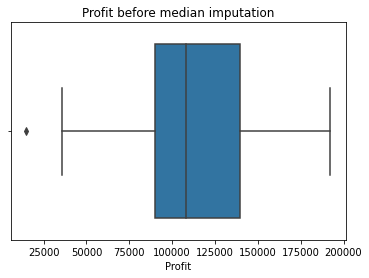

In [25]:
df1=df.copy()
sns.boxplot(df['Profit'])
plt.title('Profit before median imputation')

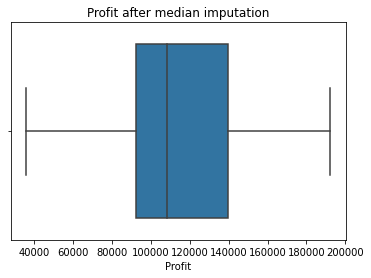

In [26]:
for i in df1['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.median(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after median imputation')
plt.show()

Let's test our data in model and compare the R-squared with Median imputation data model

In [28]:
after_median_imputation_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.9182958360807372, 0.91296730365122)

^Observation: As you can see after median imputation the model is not performing well

Let's try Mean Imputation to handle Outlier in Profit

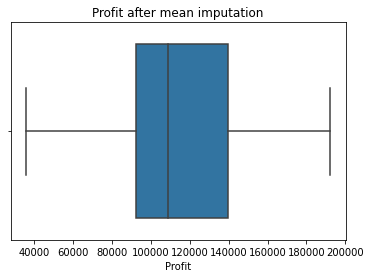

In [30]:
df2=df.copy()
for i in df2['Profit']:
    q1 = np.quantile(df2.Profit,0.25)
    q3 = np.quantile(df2.Profit,0.75)
    med = np.median(df2.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Profit'] = df2['Profit'].replace(i, np.mean(df2['Profit']))
sns.boxplot(df2['Profit'])
plt.title('Profit after mean imputation')
plt.show()

Let's test our data in model and compare the R-squared with Mean imputation data model

In [31]:
after_mean_imputation_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.9119537155310937, 0.9062115665439912)

^Observation: As you can see after mean imputation the model is not performing well it got a little worse than the median one

The best thing we can do is now to remove the outlier and see the results

In [32]:
df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

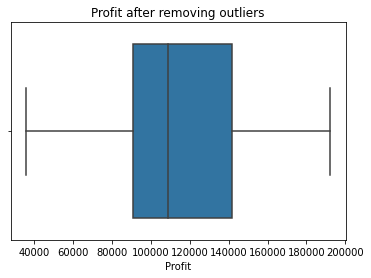

In [33]:
drop_outliers(df3, 'Profit')
sns.boxplot(df3.Profit)
plt.title('Profit after removing outliers')

Let's test our data in model and compare the R-squared with and without imputation data models

In [34]:
removed_outlier_model = smf.ols("Profit~RDS+ADMS+MKTS", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129848, 0.9587373264138505)

^Observation: A Slightly better score than the raw data model

#Exploratory Data Anlaysis

#Visualizing the Distribution of Independent Features with the help of Histograms

Text(0.5, 1.0, 'Profit')

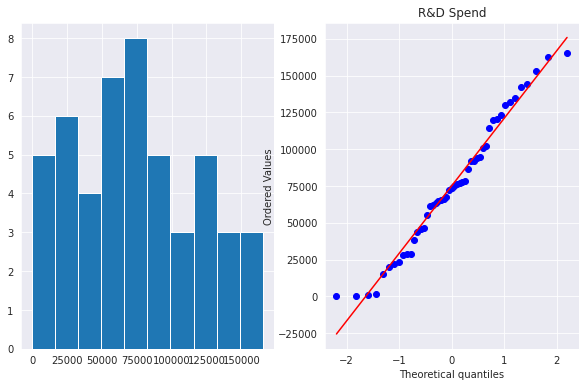

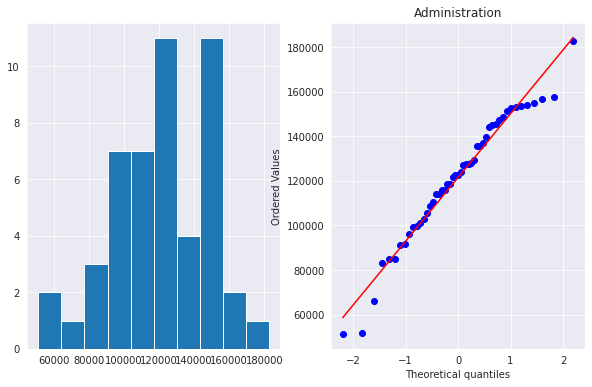

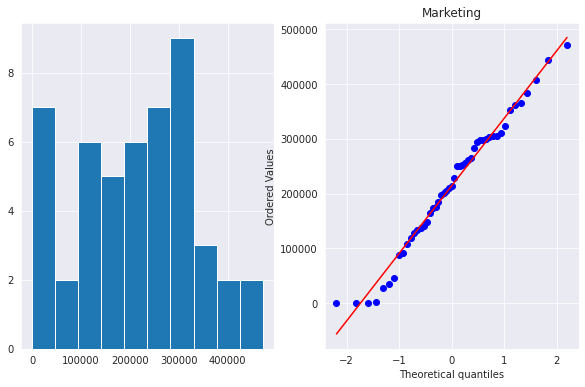

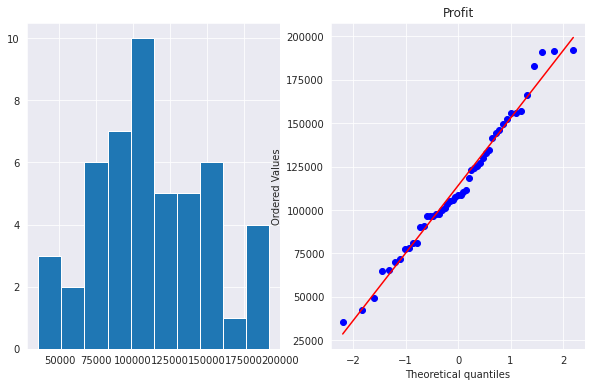

In [85]:
plot_data(df3,'RDS')
plt.title('R&D Spend')
plot_data(df3,'ADMS')
plt.title('Administration')
plot_data(df3,'MKTS')
plt.title('Marketing')
plot_data(df3,'Profit')
plt.title('Profit')

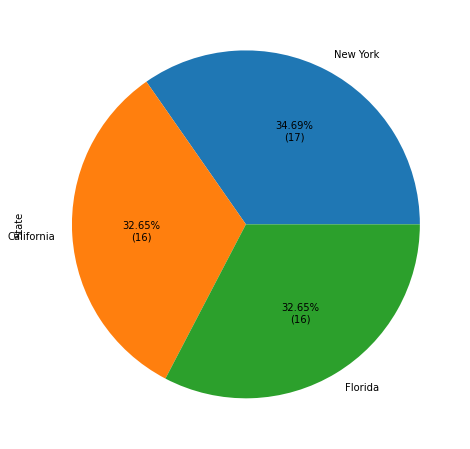

In [38]:
plt.figure(figsize=(8,8))

df3['State'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['State'].value_counts().sum())))

In [39]:
df3.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

In [40]:
df3.columns


Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [41]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('R&D Spend feature',shapiro(df3.RDS),'\n'
     'Administration feature',shapiro(df3.ADMS),'\n'
     'Marketing Spend feature',shapiro(df3.MKTS),'\n'
     'Profit feature',shapiro(df3.Profit))

R&D Spend feature ShapiroResult(statistic=0.9705318212509155, pvalue=0.2542237639427185) 
Administration feature ShapiroResult(statistic=0.9695432186126709, pvalue=0.23222382366657257) 
Marketing Spend feature ShapiroResult(statistic=0.9757168889045715, pvalue=0.401671826839447) 
Profit feature ShapiroResult(statistic=0.9793398380279541, pvalue=0.537902295589447)


^Observation: Since the p-values are not less than .05, we fail to reject the null hypothesis.

#Visualizing the Relation between each independent Feature with respect to the Dependent Feature

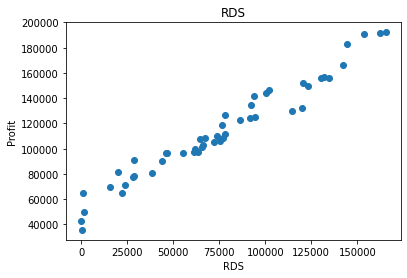

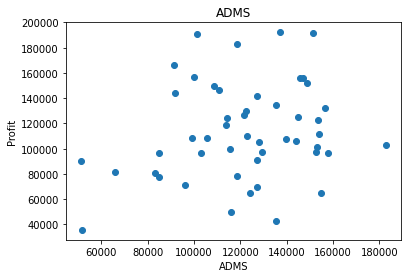

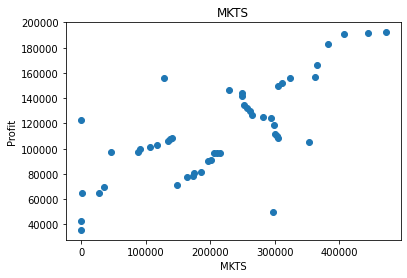

In [42]:
for feature in continuous_feature:
    if feature!="Profit":
        data=df3.copy()         
        plt.scatter(data[feature],data['Profit'])
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.title(feature)
        plt.show()

^Observation: R&D feature has a good linear relation with Profit as compare to other features

AttributeError: ignored

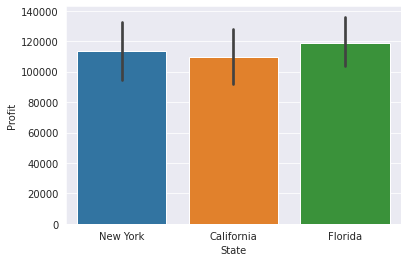

In [93]:
ax = sns.barplot(x = "State", y = 'Profit', data = df3)
for i in ax.containers:
    ax.bar.label(i)

^Observation:There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation

In [46]:
df4=df3.drop('State',axis=1)
df4.head()

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Checking the correlation between Variables

In [47]:
df4.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.243438,0.711654,0.978437
ADMS,0.243438,1.000000,-0.037280,0.205841
MKTS,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


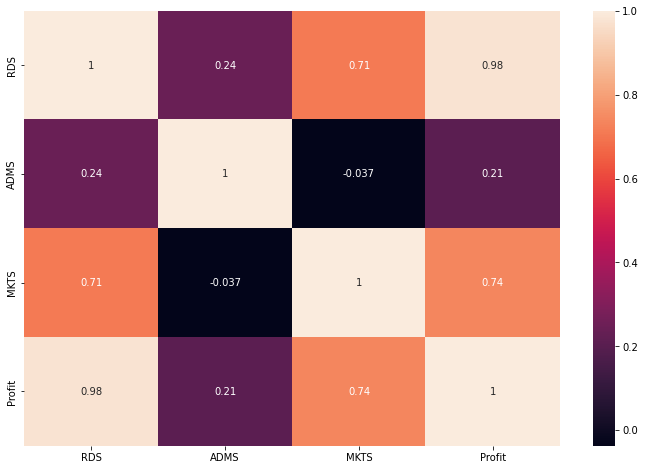

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(), annot=True)

In [ ]:
Plotting Correlation on a Pair Plot

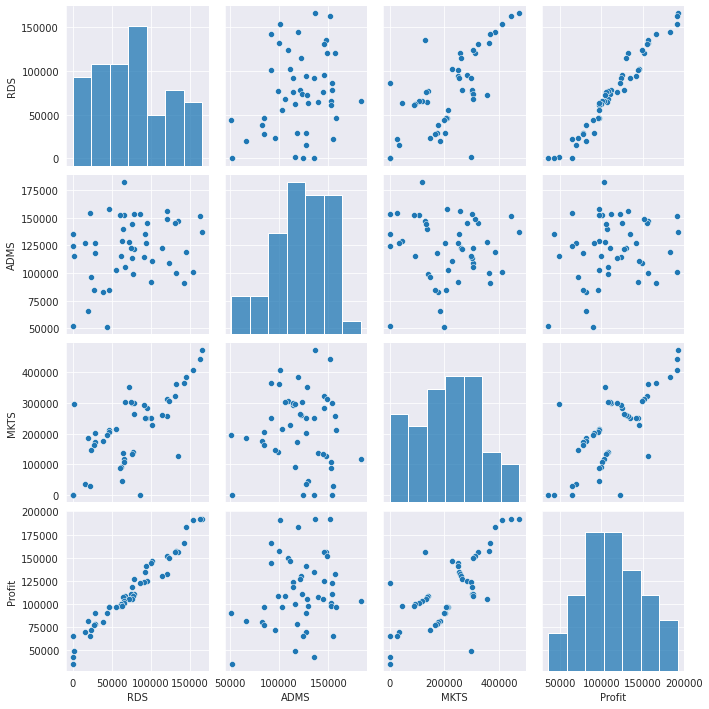

In [49]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

^Observation: R&D has the highest score of correlation with Profit

# Model Building

In [51]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()

# Model Testing

In [52]:
# Finding Coefficient parameters

model.params

Intercept    52382.439251
RDS              0.783002
ADMS            -0.022201
MKTS             0.025234
dtype: float64

In [53]:
# Finding tvalues and pvalues

model.tvalues , np.round(model.pvalues,)

(Intercept     9.450782
 RDS          20.469501
 ADMS         -0.517889
 MKTS          1.825383
 dtype: float64, Intercept    0.0
 RDS          0.0
 ADMS         1.0
 MKTS         0.0
 dtype: float64)

In [54]:

# Finding rsquared values

model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%


(0.9613162435129848, 0.9587373264138505)

In [55]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [56]:
slr_a=smf.ols("Profit~ADMS",data=df4).fit()
slr_a.tvalues , slr_a.pvalues       # ADMS has in-significant pvalue

(Intercept    3.346236
 ADMS         1.442053
 dtype: float64, Intercept    0.001618
 ADMS         0.155918
 dtype: float64)

In [57]:

slr_m=smf.ols("Profit~MKTS",data=df4).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    8.427541
 MKTS         7.526983
 dtype: float64, Intercept    5.905020e-11
 MKTS         1.304853e-09
 dtype: float64)

In [58]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=df4).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.474103
 ADMS         2.508234
 MKTS         8.027366
 dtype: float64, Intercept    1.472650e-01
 ADMS         1.572324e-02
 MKTS         2.695219e-10
 dtype: float64)

# Model Validation

# Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [59]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=df4).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=df4).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=df4).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.377754
1,ADMS,1.175172
2,MKTS,2.239957


In [60]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression eq


In [ ]:
Residual Analysis

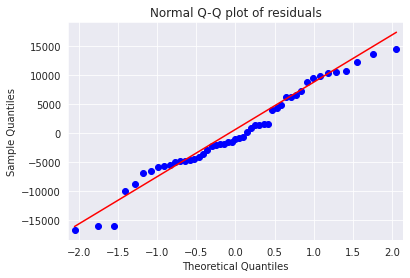

In [61]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(model.resid<-30000))

[array([], dtype=int64)]

In [ ]:
Residual Plot for Homoscedasticity

In [63]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

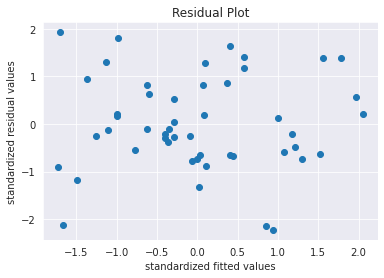

In [64]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [65]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)   

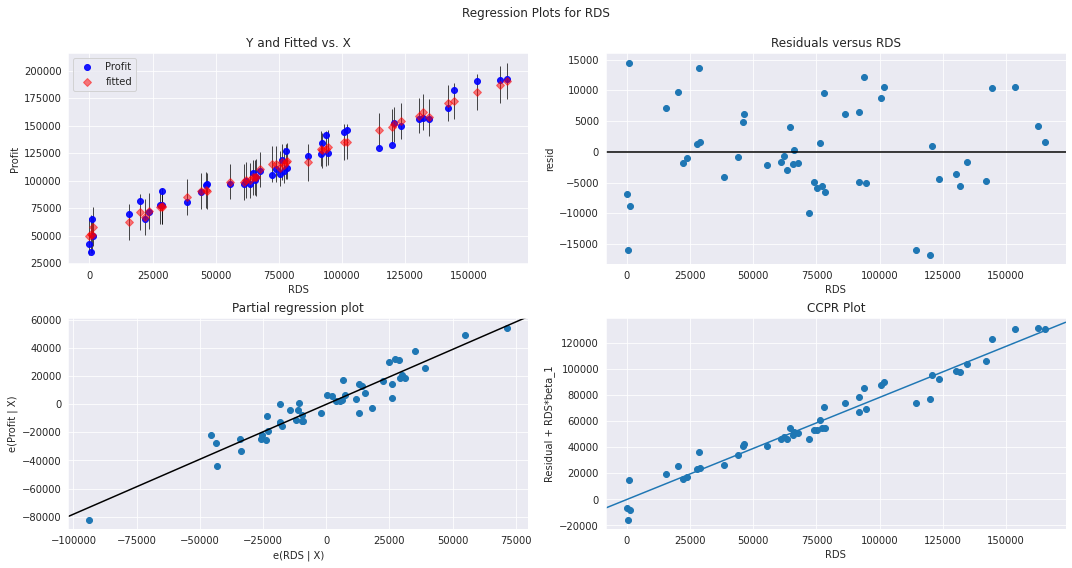

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

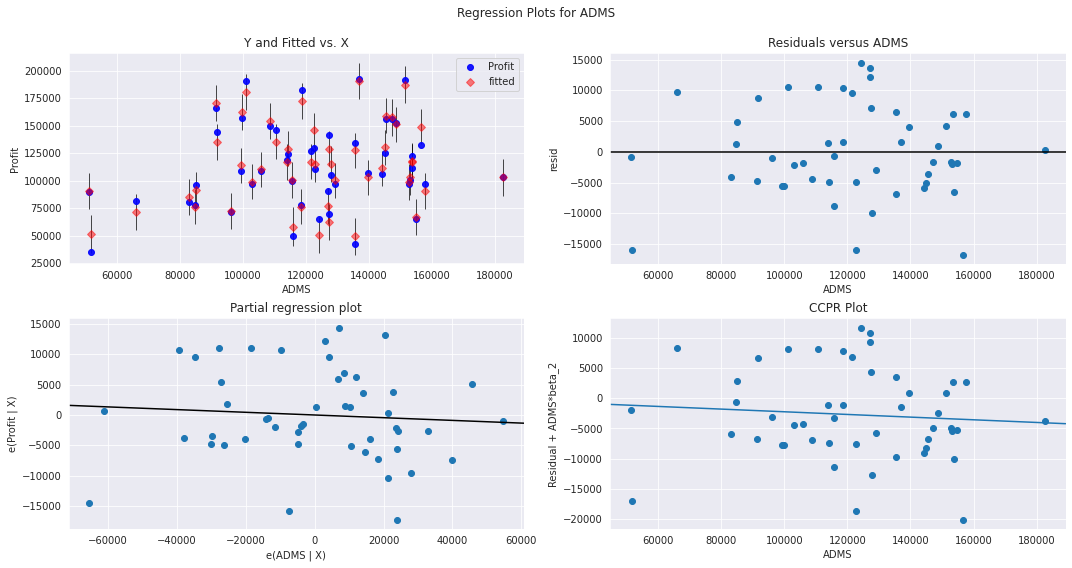

In [67]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

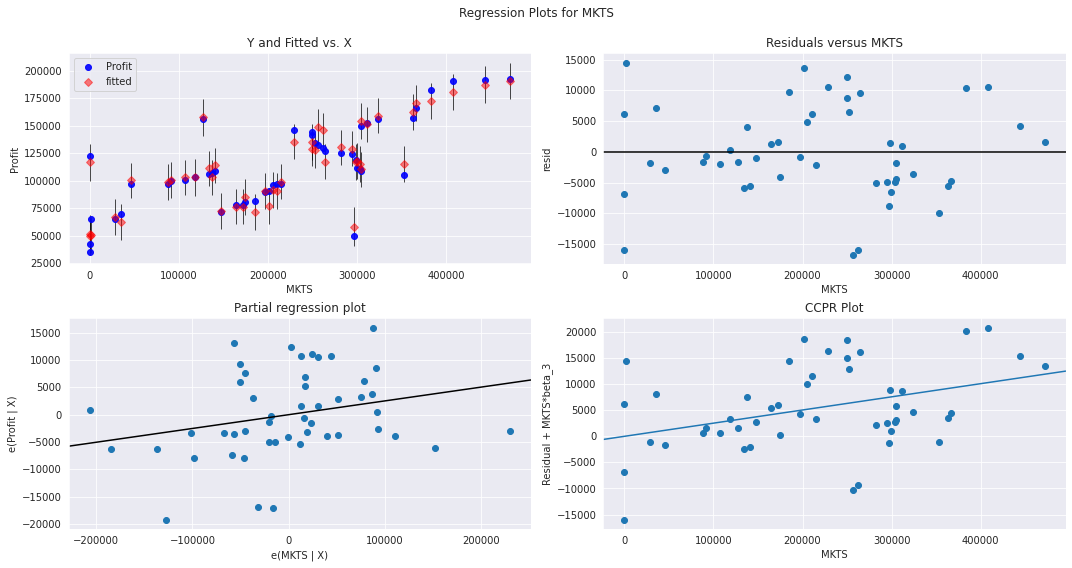

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

#Model Deletion Diagnostics (checking Outliers or Influencers)


#Two Techniques : 1. Cook's Distance & 2. Leverage value

In [69]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
 
influence_points=model.get_influence()
c, p_value=influence_points.cooks_distance

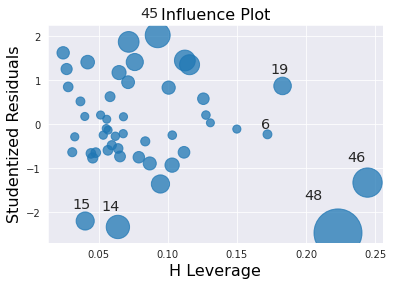

In [70]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

influence_plot(model)
plt.show()

In [71]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.30612244897959184

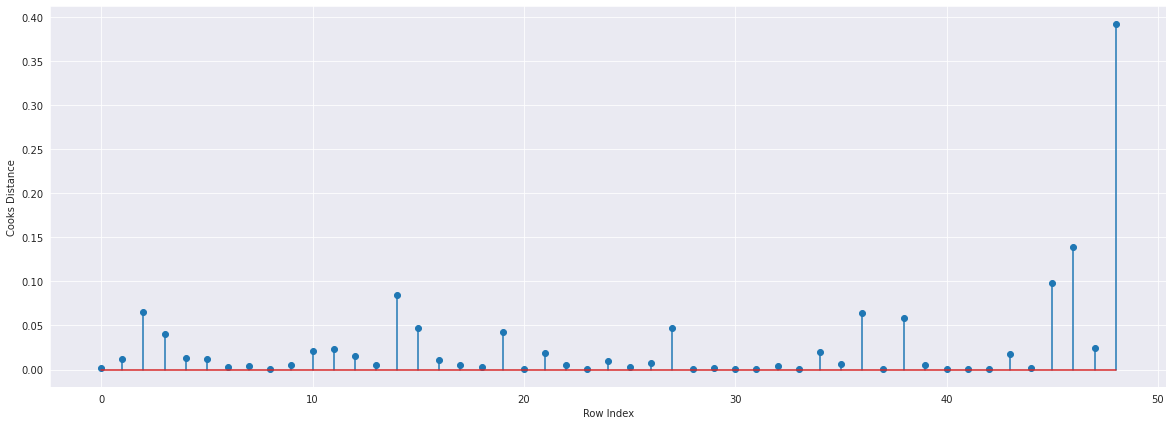

In [72]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

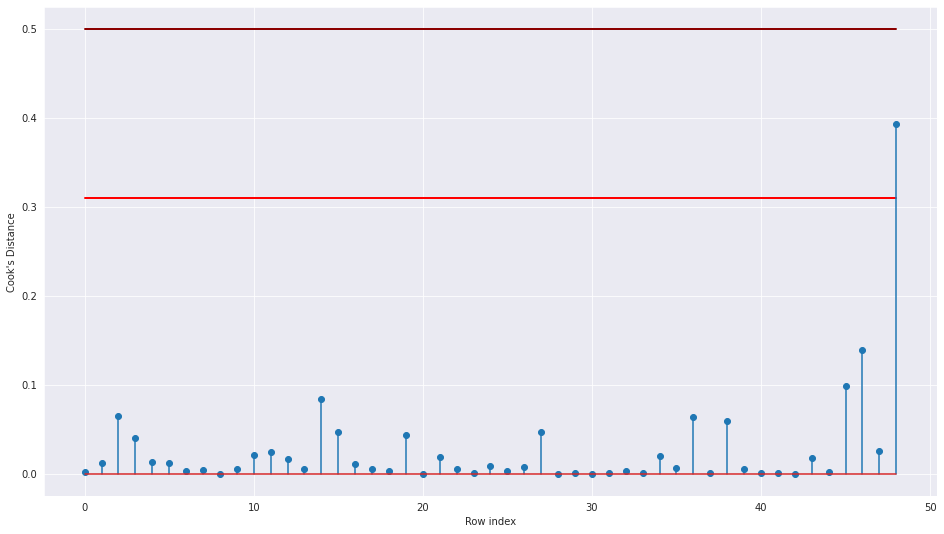

In [73]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

# Model Deletion Diagnostics and Final Model


In [74]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()


In [75]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df4=df4.drop(df4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df4
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=df4).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [76]:
final_model.rsquared 

0.9882757054424702

In [77]:
df4

,RDS,ADMS,MKTS,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96
5,91992.39,135495.07,252664.93,134307.35
6,94657.16,145077.58,282574.31,125370.37
7,91749.16,114175.79,294919.57,124266.90
8,76253.86,113867.30,298664.47,118474.03
9,67532.53,105751.03,304768.73,108733.99


# Model Predictions

In [78]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [79]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [80]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

#table containing R^2 value for each prepared model

In [81]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.961316
1,Final_Model,0.988276


In [82]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Final_Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),np.sqrt(final_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Final_Model,0.988276,0.986746,3177.423324


#Visualizing Models Performance

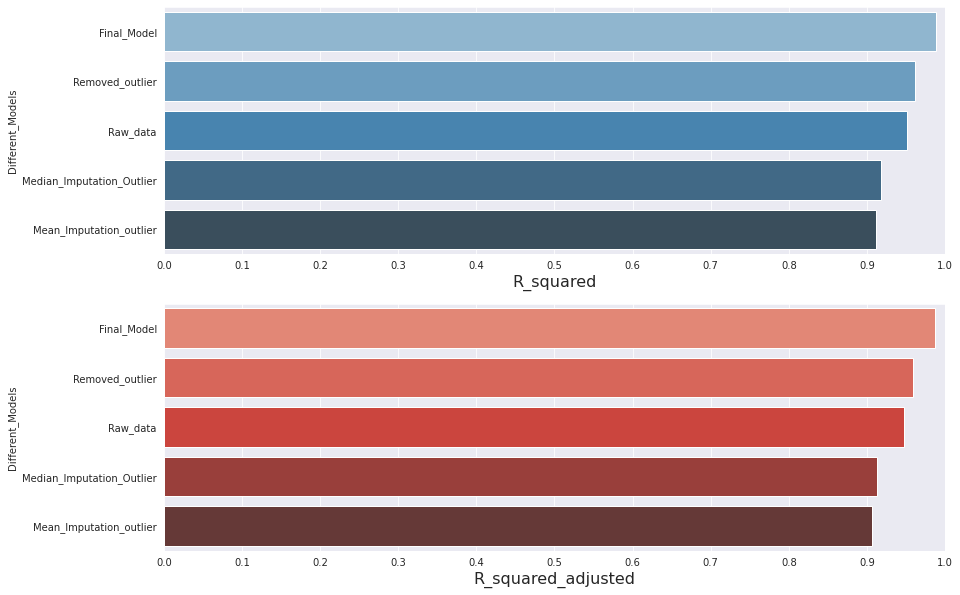

In [83]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

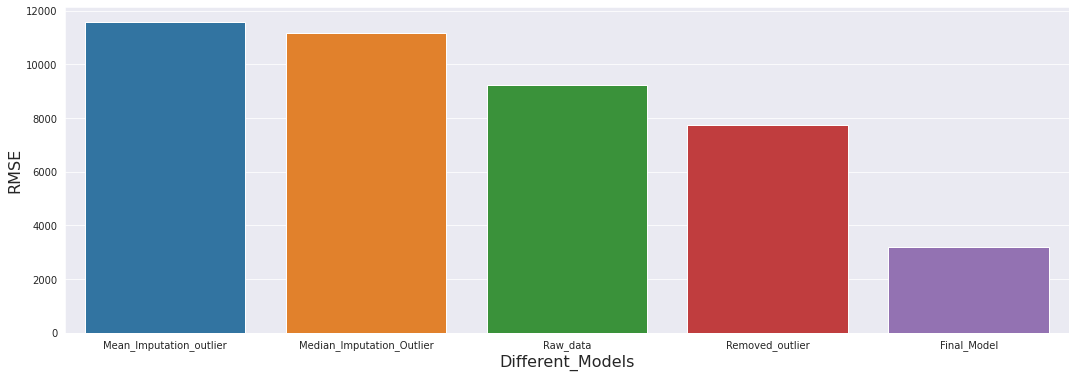

In [84]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()